In [3]:
!pip install matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# import data science basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load data
df = pd.read_csv('D:\python project only\heart %\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# data shape
df.shape

(918, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# show unique values
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [10]:
# data basic statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
# missing values in decerding order
df.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
# duplicated values
df.duplicated().sum()

np.int64(0)

In [13]:
# numerical and categorical features 
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])
print('Categorical features:\n', Categorical)
print('Numerical features:\n', Numerical)

Categorical features:
     Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]
Numerical features:
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130       

In [14]:
# count target variable
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

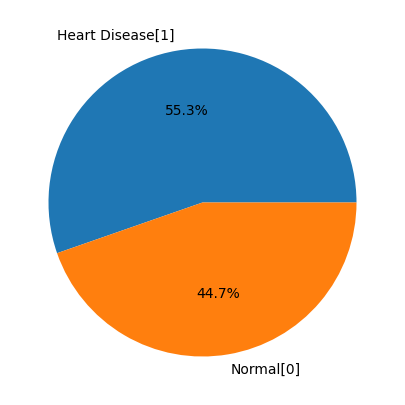

In [15]:
# Normal and Heart Disease with target column
plt.figure(figsize=(10,5))
plt.pie(df['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = df.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

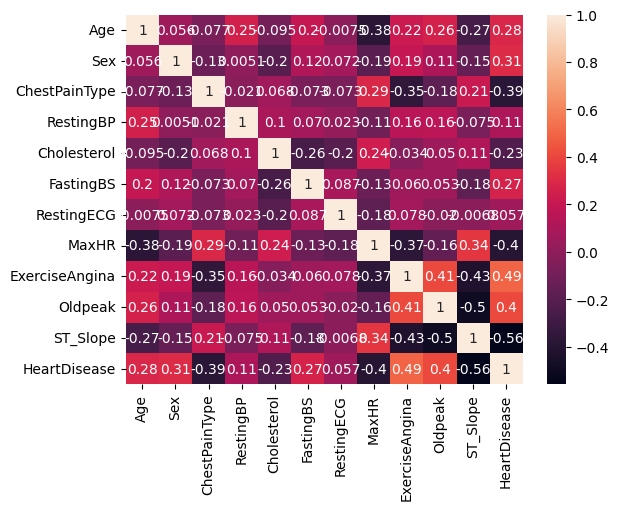

In [19]:
# ploting corelation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

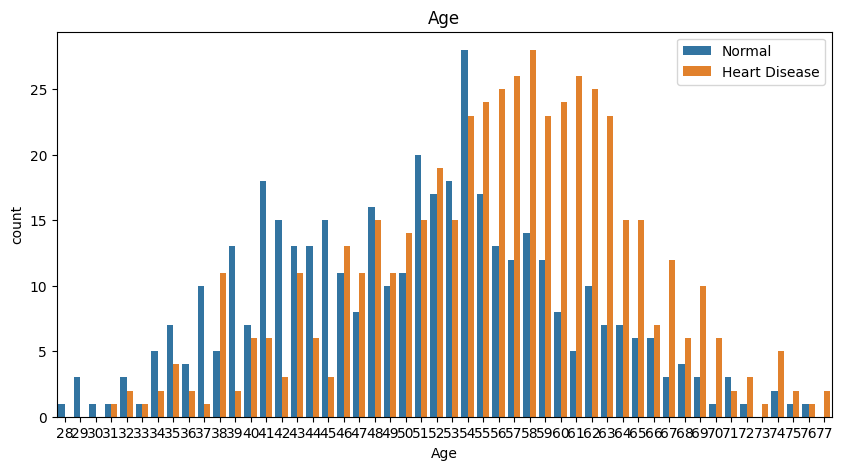

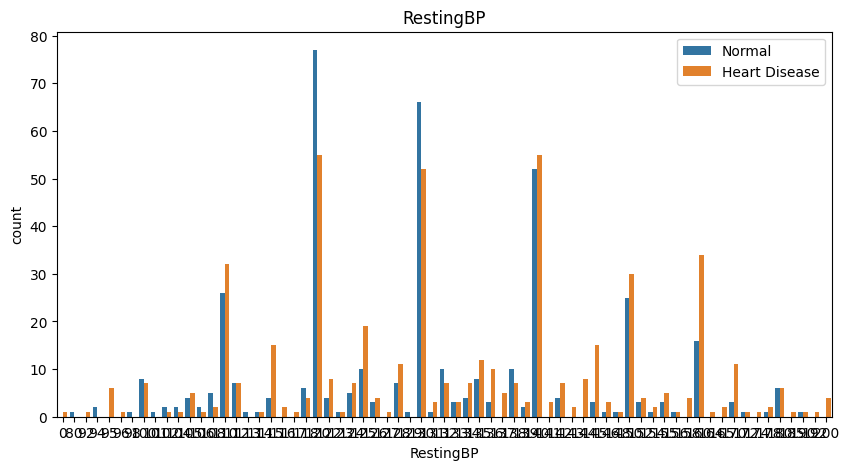

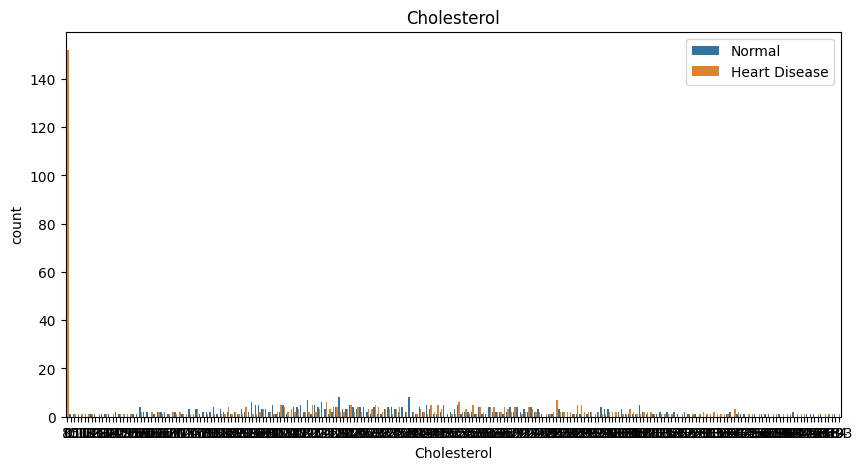

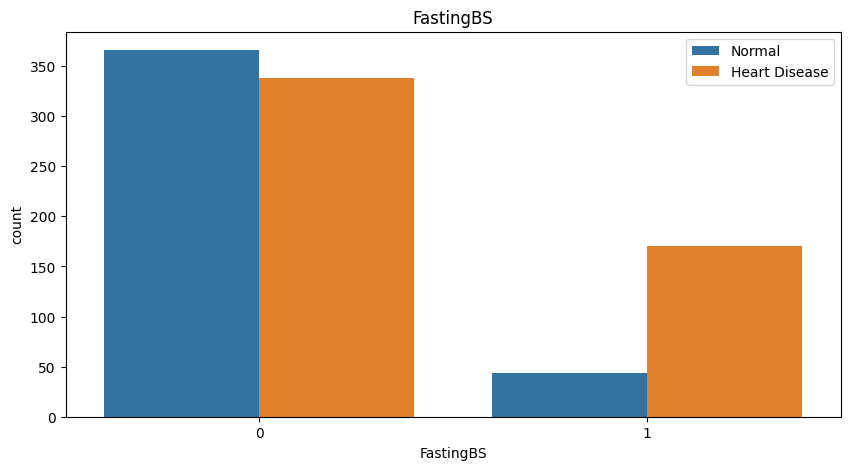

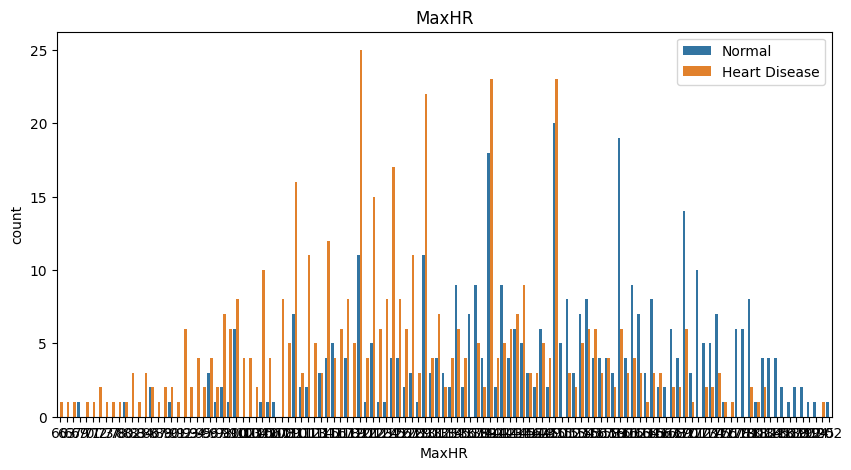

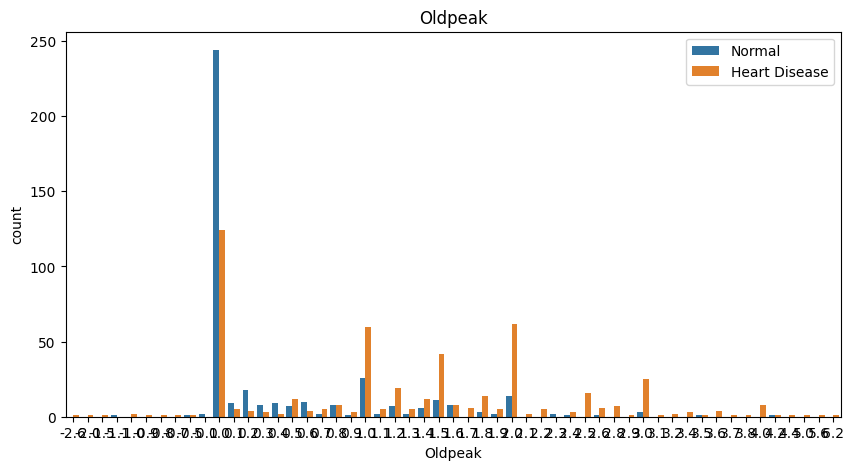

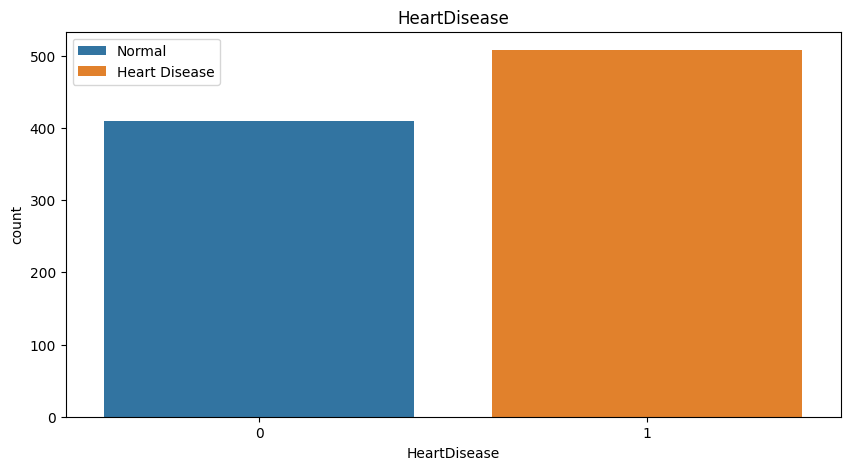

In [20]:
# ploting numerical features with target
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

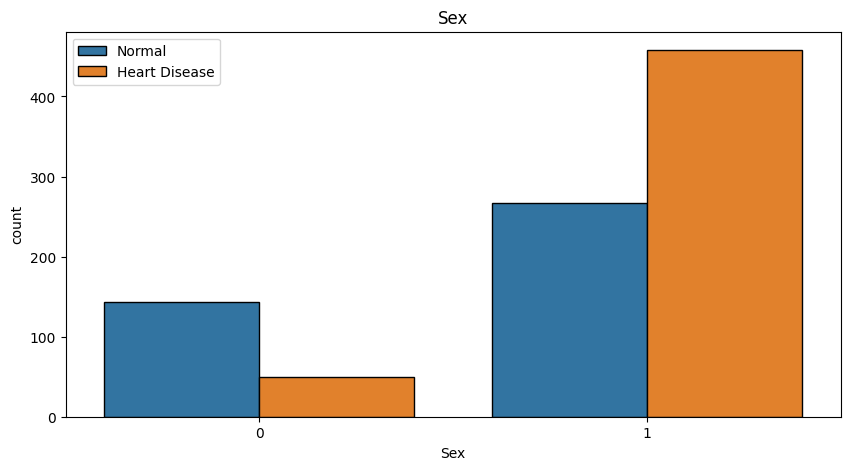

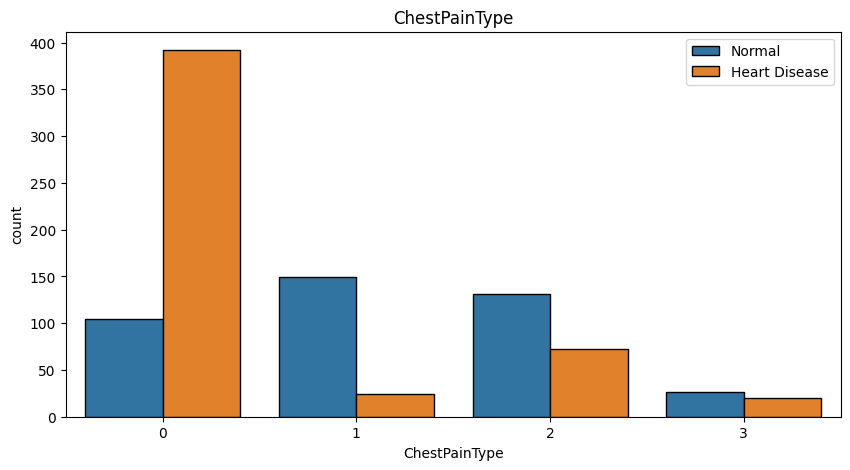

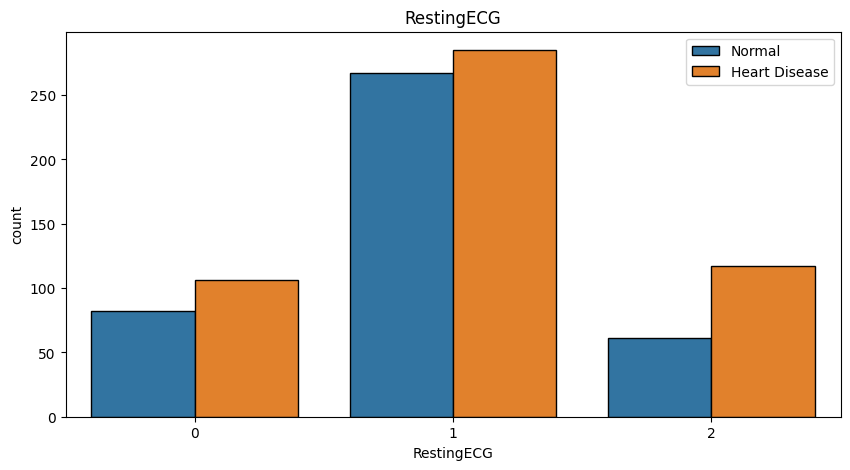

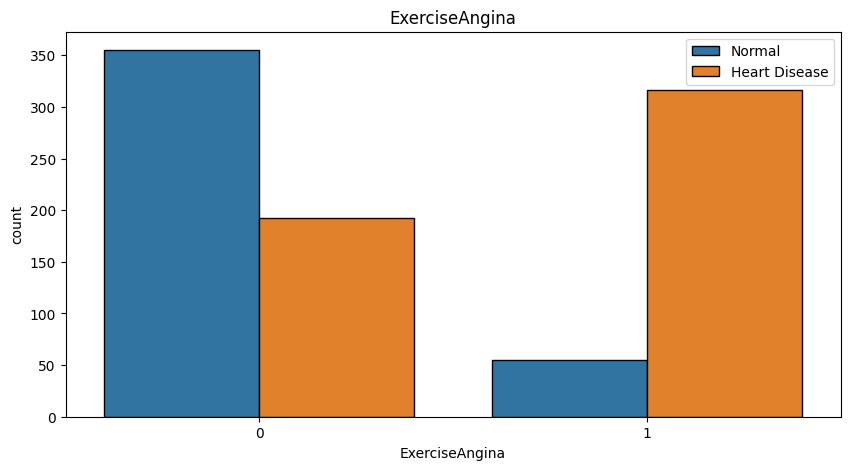

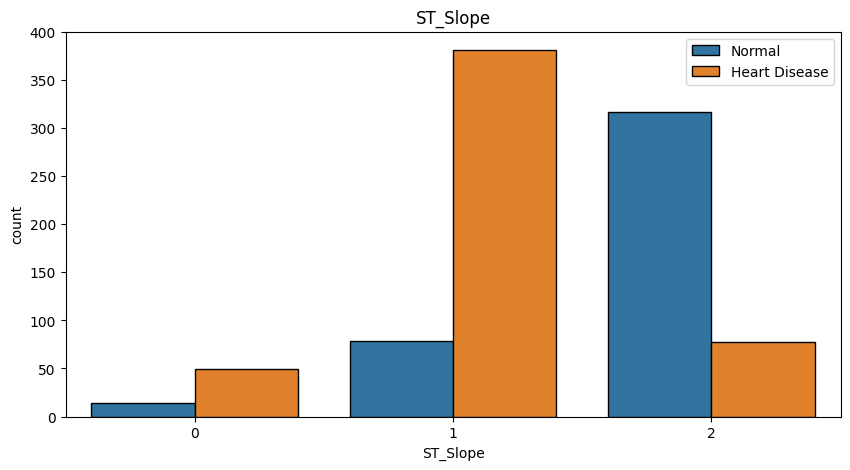

In [21]:
#ploting categorical features with target
for i in Categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

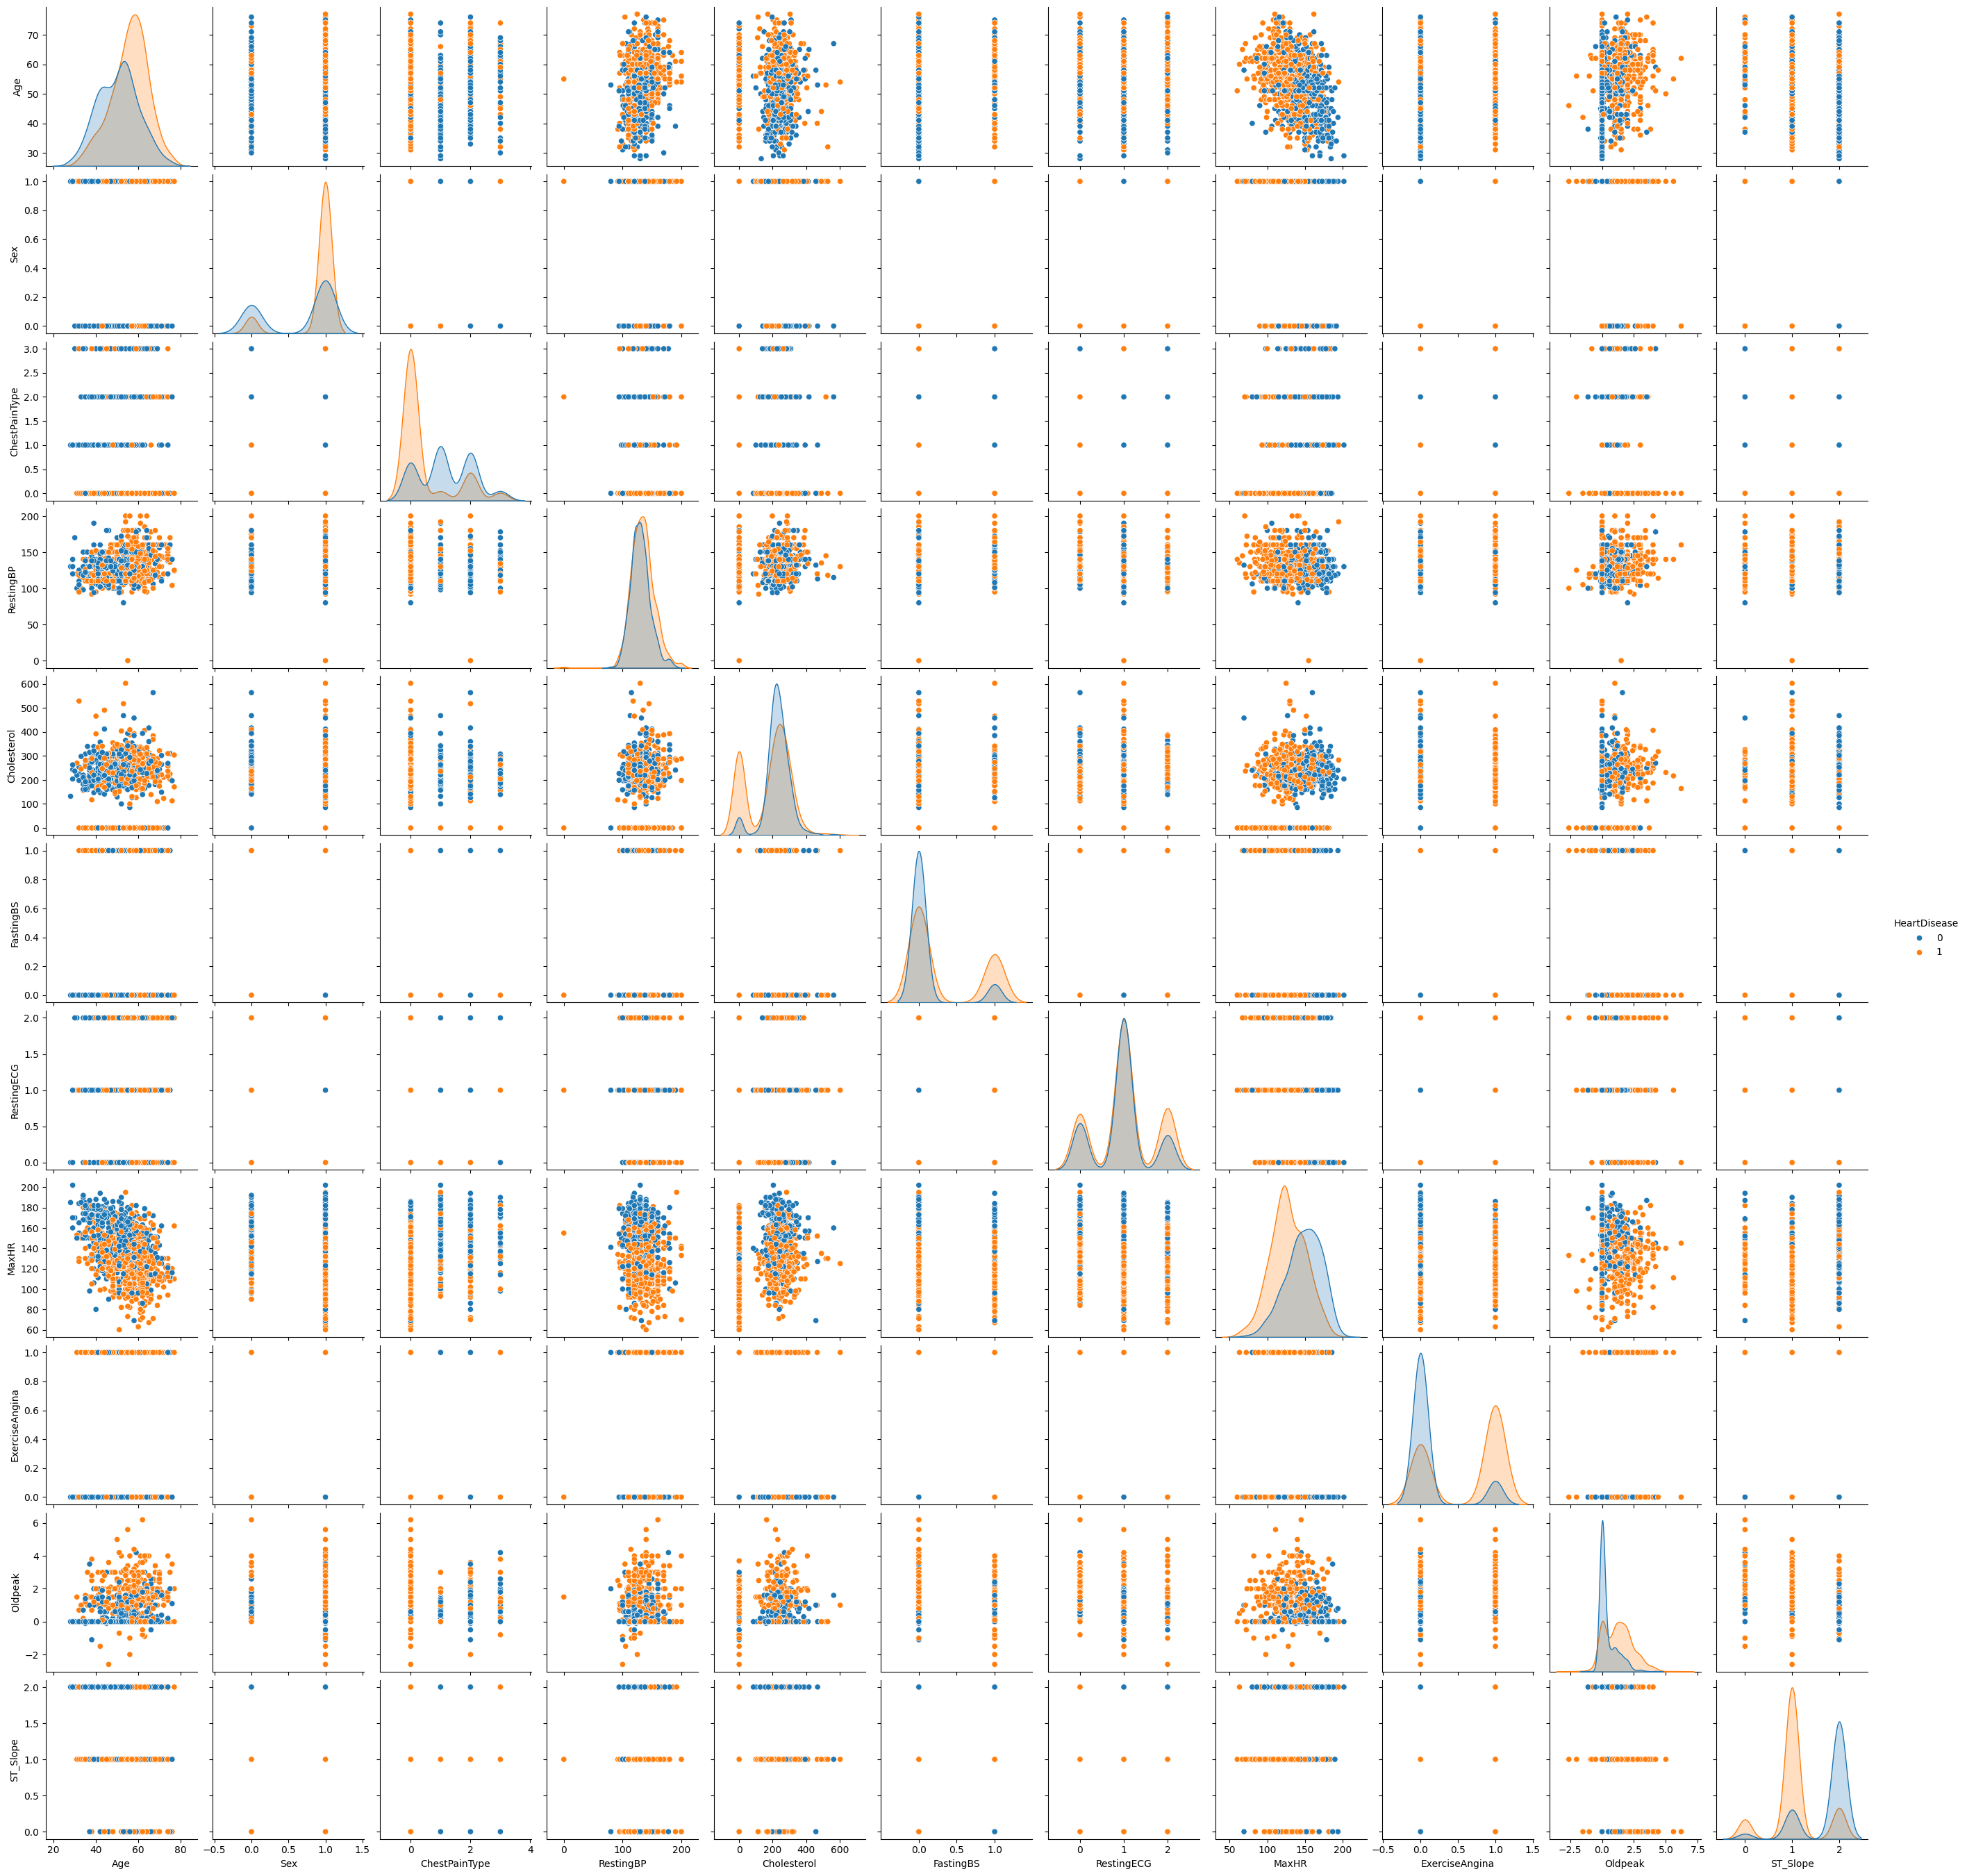

In [22]:
#pairplot using target HeartDisease Column
sns.pairplot(df, hue='HeartDisease')
plt.show()

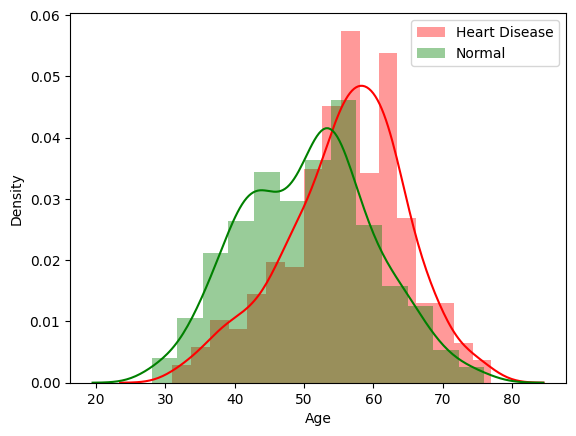

In [23]:
# distribution plot of Age for HeartDisease
sns.distplot(df['Age'][df['HeartDisease'] == 1], kde=True, color='red', label='Heart Disease')
sns.distplot(df['Age'][df['HeartDisease'] == 0], kde=True, color='green', label='Normal')
plt.legend()

In [24]:
# select numerical features and encoding it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
# apply label encoding
numerical_features = numerical_features.apply(LabelEncoder().fit_transform)
numerical_features.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,12,41,147,0,98,10,0
1,21,55,40,0,82,20,1
2,9,31,141,0,25,10,0
3,20,39,72,0,34,25,1
4,26,49,53,0,48,10,0


In [26]:
import pandas as pd

# Select categorical columns
categorical_features = df.select_dtypes(include=['object'])

# Check if categorical_features is empty
if categorical_features.empty:
    print("No categorical columns found in the dataframe!")
else:
    # Apply one-hot encoding
    categorical_features = pd.get_dummies(categorical_features)
    print(categorical_features.head())

No categorical columns found in the dataframe!


In [25]:
# One-Hot encoding the categorical features using get_dummies()
# select categorical features
categorical_features = df.select_dtypes(include=['object'])
# apply get_dummies encoding
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

ValueError: No objects to concatenate

In [27]:
# combine numerical and categorical features
combined = pd.concat([numerical_features, categorical_features], axis=1)
combined.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,12,41,147,0,98,10,0
1,21,55,40,0,82,20,1
2,9,31,141,0,25,10,0
3,20,39,72,0,34,25,1
4,26,49,53,0,48,10,0


In [28]:
# combine numerical and categorical features
combined = pd.concat([numerical_features, categorical_features], axis=1)
combined.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,12,41,147,0,98,10,0
1,21,55,40,0,82,20,1
2,9,31,141,0,25,10,0
3,20,39,72,0,34,25,1
4,26,49,53,0,48,10,0


In [29]:
y = pd.get_dummies(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']], drop_first=True)
print(y.head())

   Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
0    1              1           1               0         2
1    0              2           1               0         1
2    1              1           2               0         2
3    0              0           1               1         1
4    1              2           1               0         2


In [31]:
X = pd.get_dummies(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']], drop_first=True)
print(X.head())

   Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
0    1              1           1               0         2
1    0              2           1               0         1
2    1              1           2               0         2
3    0              0           1               1         1
4    1              2           1               0         2


In [32]:
X.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [33]:
y.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 1: XGboost

In [36]:
print(y_train.shape)  # Should be (num_samples,) and NOT (num_samples, num_outputs)

(734, 5)


In [37]:
y_train = y_train.iloc[:, 0]  # Use only the first target column
y_test = y_test.iloc[:, 0]


In [38]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [40]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 5.0/124.9 MB 27.4 MB/s eta 0:00:05
   --- ------------------------------------ 9.7/124.9 MB 26.3 MB/s eta 0:00:05
   --- ------------------------------------ 10.2/124.9 MB 21.2 MB/s eta 0:00:06
   --- ------------------------------------ 11.3/124.9 MB 14.4 MB/s eta 0:00:08
   ---- ----------------------------------- 12.6/124.9 MB 12.1 MB/s eta 0:00:10
   ---- ----------------------------------- 13.6/124.9 MB 11.0 MB/s eta 0:00:11
   ---- ----------------------------------- 14.4/124.9 MB 10.2 MB/s eta 0:00:11
   ----- ---------------------------------- 15.7/124.9 MB 9.5 MB/s eta 0:00:12
   ----- ---------------------------------- 16.8/124.9 MB 9.0 MB/s eta 0:00:13
   ----- ---------------------------------- 17.8/124.9 MB 8.6 MB/s eta 0:00:13
   ------ --------------------------------- 18.9/124.9 MB 8.3 MB/s eta 0:00:13
   ------ --------------------------------- 19.9/124.9 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from sklearn.model_selection import train_test_split

# Example dataset
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['target'] not found in axis"

In [41]:
model = XGBClassifier(n_estimators=590, objective='multi:softmax', num_class=len(y_train.unique()))

NameError: name 'XGBClassifier' is not defined

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=590)
model.fit(X_train, y_train)

In [35]:
# model building xgboost
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=590)
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Finding the best parameters using loop
accuracy = []
for i in range(550, 600):
    model = XGBClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
# ploting accuracy graph
plt.plot(range(550, 600), accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Range')
plt.show()

In [ ]:
# print precetion, recall, f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)

In [ ]:
# Feature importance for xgboost
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

Model 2: Catboost

In [ ]:
# model building catboost
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=107)
model2.fit(X_train, y_train)
# predict
y_pred = model2.predict(X_test)
# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))
# print classification report
from sklearn.metrics import classification_report
print('Classification report\n',classification_report(y_test, y_pred))

In [ ]:
# Simple parameter tuning using loop
accuracy = []
for i in range(100, 115):
    model2 = CatBoostClassifier(iterations=i)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
# ploting accuracy graph
plt.plot(range(100, 115), accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Range')
plt.show()

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)

In [ ]:
# Feature importance for xgboost
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()